In [4]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

# 이벤트 처리

## 키보드 이벤트

In [7]:
img = cv2.imread('./data/lena.jpg')

cv2.imshow('img', img)
while True:
    keycode = cv2.waitKey()
    print(keycode)
    if keycode == ord('i'):
        img = 255 - img
        cv2.imshow('img', img)
    elif keycode == ord('q'):
        break

cv2.destroyAllWindows()

105
105
105
105
115
120
102
113


## 마우스 이벤트

In [9]:
# cv2.EVENT_LBUTTONDOWN
# cv2.EVENT_LBUTTONUP
# cv2.EVENT_MOUSEMOVE
# cv2.EVENT_FLAG_SHIFTKEY

1

In [13]:
# 마우스 이벤트를 처리할 루틴
def on_mouse(event, x, y, flags, param):
    global old_x, old_y
    if event == cv2.EVENT_LBUTTONDOWN:
        old_x, old_y = x, y
        
    elif event == cv2.EVENT_LBUTTONUP:
        pass
    
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (old_x, old_y), (x, y), (0, 255, 255), 2)
            cv2.imshow('img', img)
            old_x, old_y = x, y

img = cv2.imread('./data/lena.jpg')

cv2.imshow('img', img)

# 마우스 이벤트가 발생했을 때 처리할 루틴(함수) 등록
cv2.setMouseCallback('img', on_mouse)

cv2.waitKey()
cv2.destroyAllWindows()

## 트랙바 이벤트

In [18]:
def on_level_change(pos):
    # 이벤트가 발생할 때마다 화면 밝기가 바뀌도록 구현
    img[:] = pos
    cv2.imshow('img', img)     

img = np.full((512, 512, 3), 0, np.uint8)

cv2.imshow('img', img)

# 트랙바 이벤트가 발생했을 때 처리할 루틴(함수) 등록
# cv2.createTrackbar(트랙바이름, 윈도우, 트랙바값의 범위, 이벤트발생시 처리할함수)
cv2.createTrackbar('level', 'img', 0, 255, on_level_change)
cv2.setTrackbarPos('level', 'img', 128)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# R_pos = cv2.getTrackbarPos(트랙바이름1, 윈도우)
# G_pos = cv2.getTrackbarPos(트랙바이름2, 윈도우)
# B_pos = cv2.getTrackbarPos(트랙바이름3, 윈도우)

In [29]:
def on_level_change(pos):
    # 이벤트가 발생할 때마다 화면 밝기가 바뀌도록 구현
    R_pos = cv2.getTrackbarPos('R', 'img')
    G_pos = cv2.getTrackbarPos('G', 'img')
    B_pos = cv2.getTrackbarPos('B', 'img')
    img[:] = (B_pos, G_pos, R_pos)
    cv2.imshow('img', img)

img = np.full((512, 512, 3), 0, np.uint8)

cv2.imshow('img', img)

# 트랙바 이벤트가 발생했을 때 처리할 루틴(함수) 등록
# cv2.createTrackbar(트랙바이름, 윈도우, 트랙바값의 범위, 이벤트발생시 처리할함수)
cv2.createTrackbar('R', 'img', 0, 255, on_level_change)
cv2.createTrackbar('G', 'img', 0, 255, on_level_change)
cv2.createTrackbar('B', 'img', 0, 255, on_level_change)

cv2.setTrackbarPos('B', 'img', 255)

cv2.waitKey()
cv2.destroyAllWindows()

# 유용한 기능들

## 마스크 연산

In [31]:
lena = cv2.imread('./data/lenna.bmp')
mask = cv2.imread('./data/mask_smile.bmp', cv2.IMREAD_GRAYSCALE)

# mask 이미지에서 흰색부분(mask >0)의 위치만 레나영상에서 노란색으로 바꾸기
lena[mask > 0] = (0, 255, 255) # yellow

cv2.imshow('lena', lena)
cv2.imshow('mask', mask)
cv2.waitKey()
cv2.destroyAllWindows()

In [39]:
# 빈 들판에 비행기 띄우기
src = cv2.imread('./data/airplane.bmp', cv2.IMREAD_COLOR)
mask = cv2.imread('./data/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.imread('./data/field.bmp', cv2.IMREAD_COLOR)

dst[mask>0] = src[mask>0]

#cv2.imshow("src", src)
#cv2.imshow("mask", mask)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

# 영상의 밝기 조절

**영상의 밝기**
- 분류기를 만들때 특징으로 활용이 될 수 있음 (예, 주간/야간 영상)
- 어두운 데이터의 밝기값을 조정해서 품질을 높일때 활용
- 딥러닝의 데이터를 증강(원본 데이터 + 밝기가 조정된 데이터) 하는 목적으로 활용

**영상의 밝기를 +100만큼 조절**

In [51]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
src = np.array(src, dtype=np.int32) # 음수와 255보다 큰 수까지 표현할 수 있게

dst = src.copy()
dst = src + 100
dst = np.clip(dst, 0, 255) # dst의 상한선과 하한선을 255, 0으로 지정

# 데이터 타입 복구
src = np.array(src, dtype=np.uint8)
dst = np.array(dst, dtype=np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [47]:
dst.dtype, src.dtype

(dtype('uint8'), dtype('uint8'))

In [52]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)

dst = cv2.add(src, 100)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

**TrackBar를 이용해서 레나영상의 밝기를 조절**

In [54]:
def update(pos):
    dst = cv2.add(src, pos)
    cv2.imshow('dst', dst)

src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
dst = src.copy()
cv2.imshow('dst', dst)

cv2.createTrackbar('brightness', 'dst', 0, 100, update)

cv2.waitKey()
cv2.destroyAllWindows()

# 영상의 명암비 조절

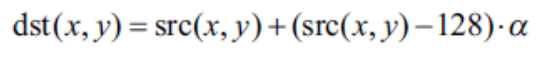

In [1]:
from IPython.display import Image
Image('./images/image1.png')

In [2]:
Image('./images/image2.png')

In [66]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)

alpha = 1.0

dst = src + (src - 128.0) * alpha
dst = np.clip(dst, 0, 255)
dst = dst.astype(src.dtype)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

# 히스토그램 분석

## cv2.calcHist() 함수

In [67]:
src = np.array([[0, 0, 0, 0],
                [1, 2, 3, 5],
                [6, 1, 2, 3], 
                [4, 3, 1, 7]], dtype=np.uint8) # 4*4, 1 channel 영상

In [68]:
# cv2.calcHist(images= [이미지], channels=[채널], mask=[마스크], histSize=[구간], ranges=[범위])
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[8], ranges=[0, 8])
hist1

array([[4.],
       [3.],
       [2.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [69]:
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[4], ranges=[0, 8])
hist2

array([[7.],
       [5.],
       [2.],
       [2.]], dtype=float32)

In [70]:
hist3 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[4], ranges=[0, 4])
hist3

array([[4.],
       [3.],
       [2.],
       [3.]], dtype=float32)

## 히스토그램 구하기 (lena)

**그레이 스케일 영상**

In [74]:
hist.shape

(32, 1)

<BarContainer object of 32 artists>

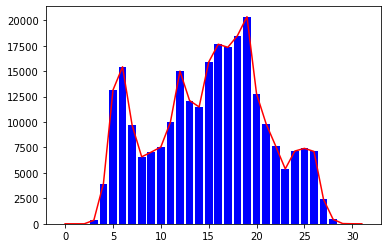

In [79]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[32], ranges=[0, 255])

plt.plot(hist, color='r')
plt.bar(np.arange(32), hist.flatten(), color='b')

In [81]:
hist.sum()

262144.0

In [83]:
src.shape[0] * src.shape[1]

262144

**컬러 영상(채널별 히스토그램)**

In [87]:
src = cv2.imread('./data/lenna.bmp')

colors = ['b', 'g', 'r']

for i in range(3):
    hist = cv2.calcHist(images=[src], channels=[i], mask=None, histSize=[256], ranges=[0, 255])
    plt.plot(hist, color=colors[i])

In [88]:
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()

## 히스토그램 스트레칭

In [3]:
from IPython.display import Image
Image('./images/image3.png')

In [93]:
src = cv2.imread('./data/hawkes.bmp', cv2.IMREAD_GRAYSCALE)

dst = (src - src.min())/(src.max() - src.min()) * 255
dst = np.array(dst, dtype=np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

**히스토그램으로 src, dst의 명암비 확인**

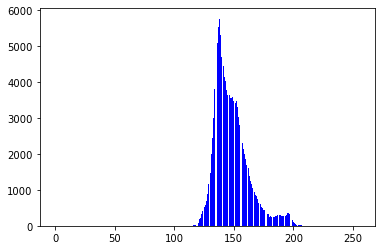

In [92]:
# 히스토그램 스트레칭 전
src_hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0, 255])
plt.bar(np.arange(256), src_hist.flatten(), color='b')
plt.show()

# 히스토그램 스트레칭 후
dst_hist = cv2.calcHist(images=[dst], channels=[0], mask=None, histSize=[256], ranges=[0, 255])
plt.bar(np.arange(256), dst_hist.flatten(), color='b')
plt.show()

## 히스토그램 평활화 (GrayScale Image)

In [97]:
src = cv2.imread('./data/hawkes.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows() 

**히스토그램으로 src, dst의 명암비 확인**

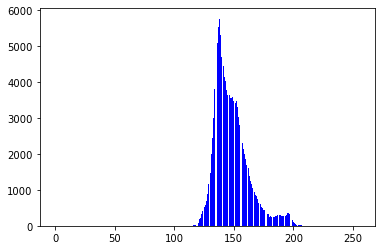

In [96]:
# 히스토그램 평활화 전
src_hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0, 255])
plt.bar(np.arange(256), src_hist.flatten(), color='b')
plt.show()

# 히스토그램 평활화 후
dst_hist = cv2.calcHist(images=[dst], channels=[0], mask=None, histSize=[256], ranges=[0, 255])
plt.bar(np.arange(256), dst_hist.flatten(), color='b')
plt.show()

## 히스토그램 평활화 (Color Image)

**컬러이미지 히스토그램 평활화의 잘못된 예**
- 각 채널별로 평활화를 수행한 후 합치게 되면
- 입력 영상만의 고유한 색상 조합이 깨짐

In [101]:
src = cv2.imread('./data/pepper.bmp')

b = src[:, :, 0]
g = src[:, :, 1]
r = src[:, :, 2]
# b, g, r = cv2.split(src)

dst_b = cv2.equalizeHist(b)
dst_g = cv2.equalizeHist(g)
dst_r = cv2.equalizeHist(r)

dst = src.copy()
dst[:, :, 0] = dst_b
dst[:, :, 1] = dst_g
dst[:, :, 2] = dst_r
# cv2.merge([dst_b, dst_g, dst_r])


cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

**컬러이미지 히스토그램 평활화의 잘된 예**
- 명암비를 조절한다는것은 '밝기'값만 관계가 있으므로
- 컬러공간(Color Space)을 BGR에서 yCrCb(y:밝기값, Cr/Cb:색상)로 바꾼뒤에 
- y(밝기) 채널에 대해서만 히스토그램 평활화를 수행 
- 합치면 색상 정보는 그대로 유지

In [103]:
src = cv2.imread('./data/pepper.bmp') # BGR
src_yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

y, Cr, Cb = cv2.split(src_yCrCb)
y_equalized = cv2.equalizeHist(y)

dst_yCrCb = cv2.merge([y_equalized, Cr, Cb])
dst = cv2.cvtColor(dst_yCrCb, cv2.COLOR_YCrCb2BGR)


cv2.imshow('src', src)
cv2.imshow('dst', dst) # BGR 채널 순서를 기대
cv2.waitKey()
cv2.destroyAllWindows()